# Maternal Health Risk Analysis and Classification

# 1. Problem Identification

Many pregnant women die from pregnancy issues as a result of a lack of information on maternal health care during and after pregnancy. It is more common in rural regions and among lower-middle-class families in emerging countries. During pregnancy, every minute should be observed to ensure the proper growth of the baby and the safe delivery. 


Pregnancy complications may be caused by conditions women have before pregnancy or conditions women develop during pregnancy. The impact of pregnancy complications on maternal and neonatal outcomes is difficult to estimate because pregnancy complications are made up of a broad range of conditions with varying levels of severity. Every year, an estimate of 358,000 maternal mortalities is recorded worldwide, with about 99% cases occurring in poor developing countries. Early screening is expected to reduce maternal mortality rates . The purpose of this research, therefore, was to analyze the risk factors associated with risk level in the dataset and to also identify fit models with the capacity to predict maternal complications.


<img src="https://miro.medium.com/max/400/1*rmj7B0EumeMHL4SiW6tD5Q.gif" width="600px">



# 5 Algorithms Classification

We used dataprep EDA and 4 algorithms Classification



* Random Forest Classifier
* Gradient Boosting 
* Support Vector Machine
* Gaussian Naive Bayes

Data Set Information:


Data has been collected from different hospitals, community clinics, maternal health cares through the IoT based risk monitoring system.

* Age: Age in years when a woman is pregnant.
* SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
* BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
* HeartRate: A normal resting heart rate in beats per minute.
* Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Dataset link :

[HERE](https://www.kaggle.com/csafrit2/maternal-health-risk-data)

# 2. Importing Packages and Dataset

## 2.1 Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


## 2.2 Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/miwal/MATERNAL_RISK/MaternalHealthRiskDataSet.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# 3. Variable Description and Identification 

In [3]:
df.sample(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
29,28,90,60,7.2,98.0,82,low risk
956,32,140,100,6.9,98.0,78,high risk
893,15,76,49,7.9,98.0,77,low risk
751,26,85,60,6.0,101.0,86,mid risk
266,28,90,60,6.9,98.0,82,low risk


Let's check our dataset information first.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


## 3.1 Variable Description

We can see total 6 variables, and each variables has 1014 observations. **Here comes the description of all variables:**<br/>
   1. **Age**: Any ages in years when a women during pregnant.
   2. **SystolicBP**: Upper value of Blood Pressure in mmHg.
   3. **DiastolicBP**: Lower value of Blood Pressure in mmHg,
   4. **BS**: Blood glucose levels is in terms of a molar concentration, mmol/L.
   5. **BodyTemp**: Women body temperature.
   5. **HeartRate**: A normal resting heart rate in beats per minute.
   6. **Risk Level**: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Here, we have Risk Level as target variable, and the rest of the variables are predictor variables. 

## 3.2 Variable Data Types

**Categorical Variable**: Risk Level.

**Numerical Variable**: Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.

## 3.3 Checking Null/Missing Values

In [5]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Looks like there's no null/missing values in this dataset. We can move on to the next step.

## 3.4 Checking Duplicates

Duplication just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. 

In [6]:
print(f"There are {df.duplicated().sum()} duplicates data")

There are 562 duplicates data


In [7]:
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


Wow, 562 duplicates data. That's very big number. **What should we do now?**<br/>
Duplicate data takes up unnecessary storage space and slows down calculations at a minimum. At worst, duplicate data can skew analysis results and threaten the integrity of the data set. Including them will essentially lead to the model overfitting this subset of points. But in this case, we will try to analyze this data first to understand the distribution of the data.

## 3.5 Descriptive Statistics of The Data.

In [8]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [9]:
df.describe(include='object')

,RiskLevel
count,1014
unique,3
top,low risk
freq,406


# 4. Univariate Analysis

Univariate analysis separately explores the distribution of each variable in a data set. It looks at the range of values, as well as the central tendency of the values. Univariate data analysis does not look at relationships between various variables (like bivariate and multivariate analysis) rather it summarises each variable on its own.<br/><br/>
Methods to perform univariate analysis will depend on whether the variable is categorical or numerical. For numerical variable, we would explore its shape of distribution (distribution can either be symmetric or skewed) using histogram and density plots. For categorical variables, we would use bar plots to visualize the absolute and proportional frequency distribution. 

## 4.1 Categorical Variables

For categorical variables, we'll just checking the frequency distribution of the data using bar plot. Another way to show the relationships between classes or categories of a variable is in a pie or circle chart. In a pie chart, each "slice" represents the proportion of the total phenomenon that is due to each of the classes or groups.

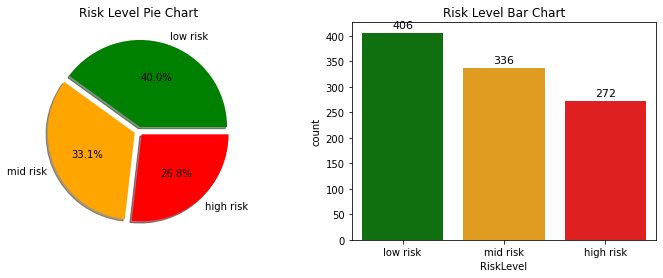

In [10]:
p_colors = ['green', 'orange', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level Bar Chart")
plt.show()

Looks like most pregnant weomen in this dataset mostly has low health risk. 
Out of 1014 observations, 406 (40%) of pregnant women has low risk, 336 (33.1%) has med risk, and 272 (26.8%) has high risk. 
We will explore the data to get more insights and see why pregnant women has different health risk. We will try to check each variable that can affect it. Let's explore it one by one.

## 4.2 Numerical Variables

It's different from categorical variables which only has a few values that represent different classes/categories, numerical variables has a continuous value. Therefore to understand the distribution of data on each variable, we'll use **histogram** instead of bar chart.  A histogram is a chart that is similar to a bar chart, but it is used for interval and ratio level variables. 

Another thing to pay attention to in numerical data is outliers. An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. If the outliers are non-randomly distributed, they can decrease normality (making the graph skewed). It increases the error variance and reduces the power of statistical tests. They can cause bias and/or influence estimates. We will use **box plot** to visualize continous data to find out whether there are outliers or not.

But before that, we can use *desctibe()* function from pandas to display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, for early observation.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


As we can see, looks like **Age**, **BS**, and **HeartRate** variable has outlier in it. But this is just preliminary guess. Let's explore the data deeper.

In [12]:
def num_plot(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

### 4.2.1 Age

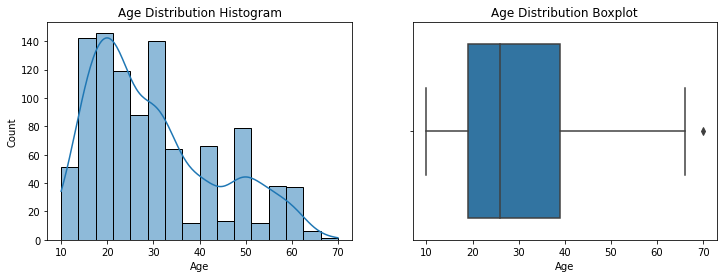

In [13]:
num_plot(df, "Age")

### 4.2.2 SystolicBP

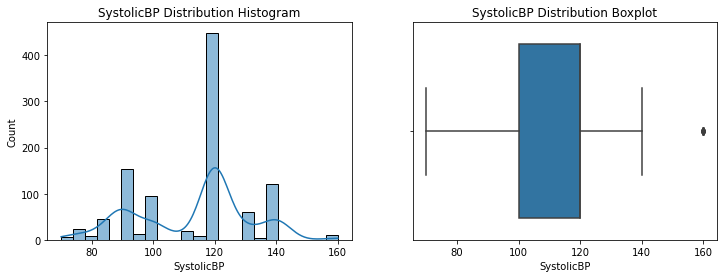

In [14]:
num_plot(df, "SystolicBP")

### 4.2.3 DiastolicBP

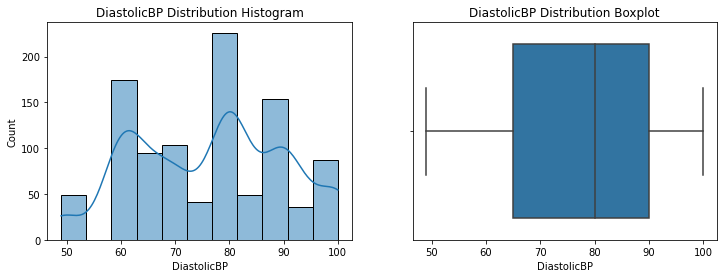

In [15]:
num_plot(df, "DiastolicBP")

### 4.2.4 BS

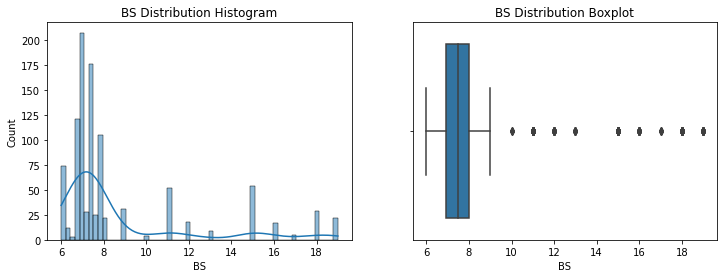

In [16]:
num_plot(df,"BS")

### 4.2.5 BodyTemp

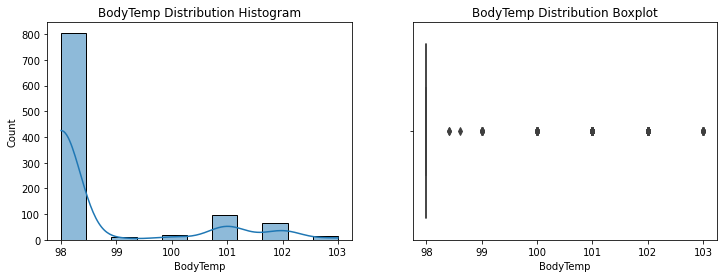

In [17]:
num_plot(df, "BodyTemp")

### 4.2.6 HeartRate

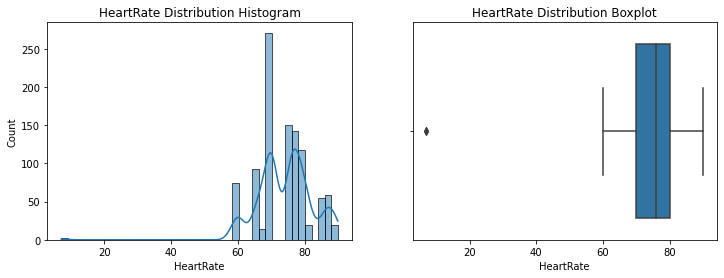

In [18]:
num_plot(df, "HeartRate")

**Observation:**
Apparently, almost all variables has outlier that cause skewed distribution. For now, we will just ignore that outlier because that value seems to be a natural thing in this case, except for **HeartRate**. That variable has an outlier with a value that is too far from the other values.

# 5. Bivariate Analysis

Bivariate analysis lets you study the relationship that exists between two variables. It helps to find out if there is an association between the variables and if yes then what is the strength of association. One variable here is dependent while the other is independent. We can use correlation coefficients to find out how high is the relationship between two variables. We can also use scatter plot to show the patterns that can be formed using the two variables

## 5.1 Numerical Variables

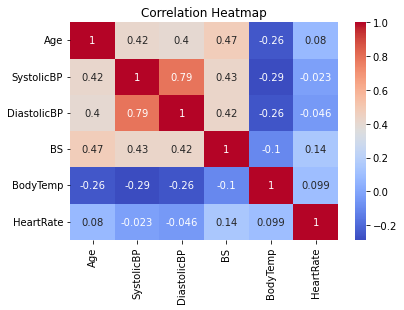

In [19]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Since we only have 6 numerical variables, we'll just use pairplot here.

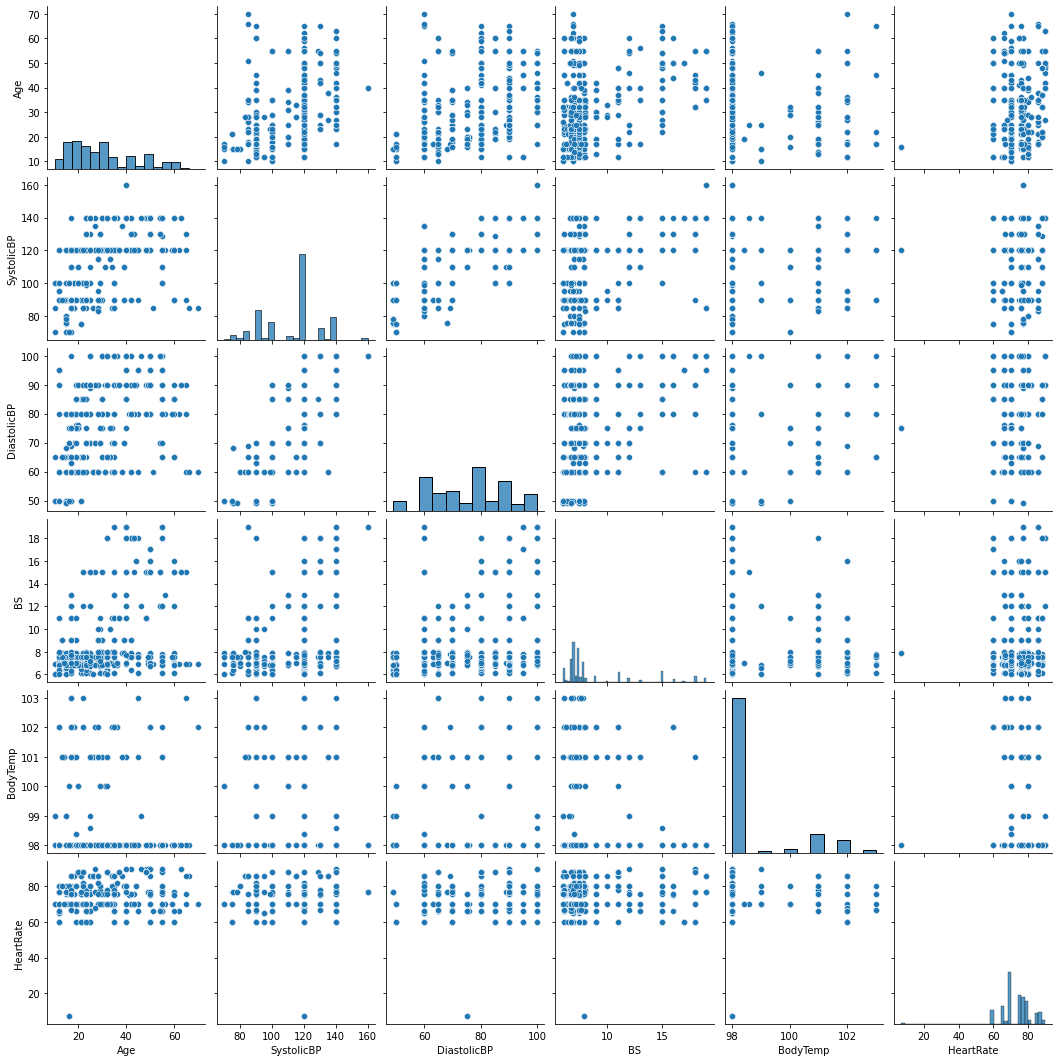

In [20]:
sns.pairplot(df)
plt.show()

**Observation:** **SystolicBP** and **DiastolicBP** are highly correlated. As we can see from the graph, they have positive correlation with correlation coefficient value = 0.79. This means that SystolicBP and DiastolicBP variable contains highly similar information and there is very little or no variance in information. This is known as a problem called **MultiColinearity**, which undermines the statistical significance of an independent variable. We can remove one of them because we don't want a **redundant** variable while making or training our model. But we will try to dig deeper to decide whether we need to remove these variable, and which variable we should remove

## 5.2 Predictor and Target

We will use histogram with hue mapping to visualize the predictor variables data distribution based on the target variable. Also, since our predictor variable only has few unique values, we can also use pandas crosstab to see the detailed values.

### 5.2.1 Age → RiskLevel

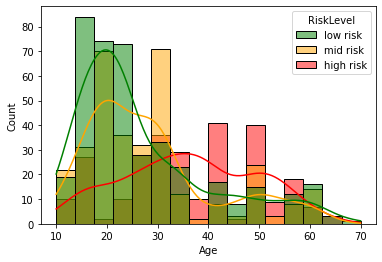

In [21]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [22]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


**Observation:** 
1. Pregnant women aged below 24 years mostly has low health risk.
2. Health risks will start to increase after that age (starting from the age of 25 years).
3. Surprisingly, the health risk of pregnant women over 59 years old is decreased

### 5.2.2 SystolicBP → RiskLevel

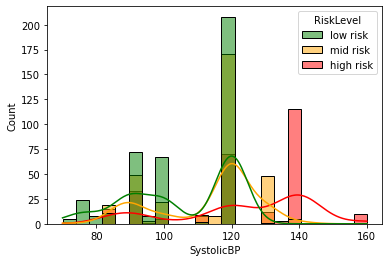

In [23]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [24]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


**Observation:**
1. Pregnant women with upper value of blood pressure <= 120 mmHg mostly has low health risk.
2. The higher pregnant women's blood pressure, the higher the health risk

### 5.2.3 DiastolicBP → RiskLevel

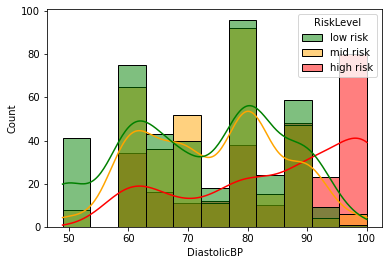

In [25]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [26]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


**Observation:**
1. This variable has pretty similar pattern as SystolicBP. This is not surprising since they're highly correlated.

### 5.2.4 BS → RiskLevel

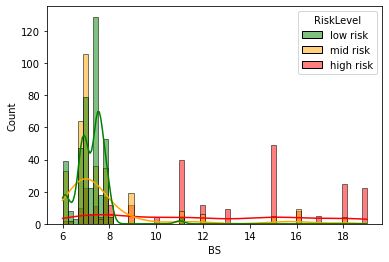

In [27]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [28]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='summer_r')

BS,6.0,6.1,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.01,7.1,7.2,7.5,7.6,7.7,7.8,7.9,8.0,9.0,10.0,11.0,12.0,13.0,15.0,16.0,17.0,18.0,19.0
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


**Observation:**
1. Almost every pregnant women with blood glucose level >= 8 has high health risk.
2. But otherwise, they seems to have lower health risk with blood glucose < 8

### 5.2.5 BodyTemp → RiskLevel

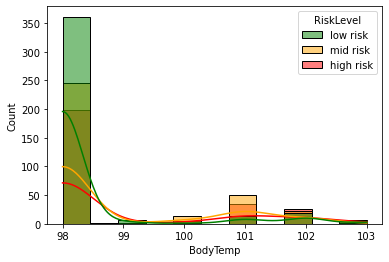

In [29]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [30]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.0,98.4,98.6,99.0,100.0,101.0,102.0,103.0
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


**Observation:**
1. Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature
2. Pregnant women with body temperature >= 100 mostly has higher health risk

### 5.2.6 HeartRate → RiskLevel

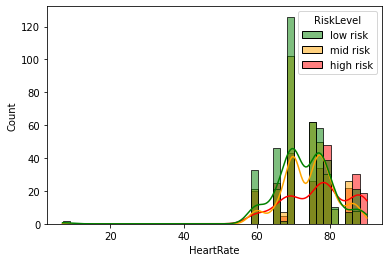

In [31]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [32]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


**Observation:**
1. As i mentioned before, HeartRate variable has outlier that with a value that looks unnatural, which is 6 bpm.
2. Health risks seem to be getting higher along with the number of heart rate.

# 6. Multivariate Analysis

Multivariate analysis involves analyzing multiple variables (more than two) to identify any possible association  and find the relationship among them. More specifically, we will try to associate more than one predictor variable with the response variable. 

In this case, we will just analyze the impact of 2 different predictor variables at a time on RiskLevel variable. We will use scatter plot since all of our predictor variables has numerical values, and then group them using RiskLevel values with different colors.

## 6.1 Age and SystolicBP → RiskLevel

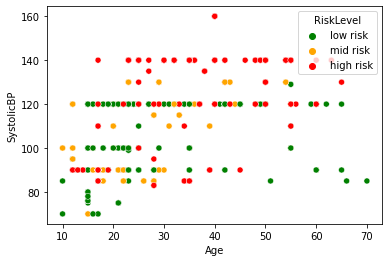

In [33]:
sns.scatterplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with high SystolicBP seems to have a high health risk, regardless of their age.
2. Having low SystolicBP at a young age (under 50 years) doesn't guarantee low health risk, but in old age it seems to lower the health risks.

## 6.2 Age and DiastolicBP → RiskLevel

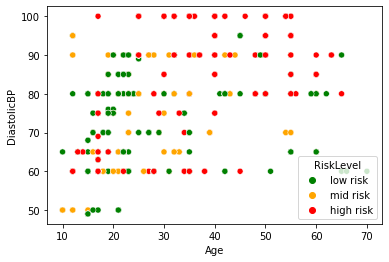

In [34]:
sns.scatterplot(data=df, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. We can see the same pattern as before, since SystolicBP and DiastolicBP are highly correlated.

## 6.3 Age and BS → RiskLevel

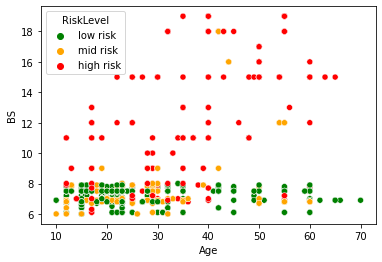

In [35]:
sns.scatterplot(data=df, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with high blood glucose level seems to have a high health risk, regardless of their age.

## 6.4 Age and BodyTemp → RiskLevel

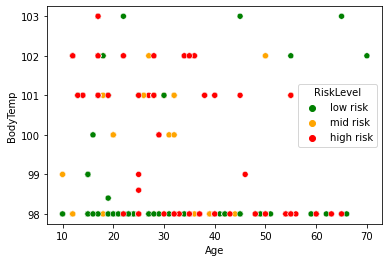

In [36]:
sns.scatterplot(data=df, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Younger women with normal body temperature mostly have low health risk, but they'll have higher risk if they have high body temperature.
2. High body temperature for older women doesn't doesn't appear to significantly affect their health risks

## 6.5 Age and HeartRate → RiskLevel

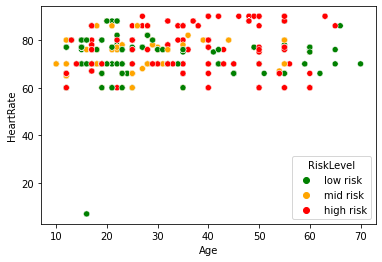

In [37]:
sns.scatterplot(data=df, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. It seems that heart rate has less effect on pregnant women's health risk compared to age

## 6.6 SystolicBP and DiastolicBP → RiskLevel

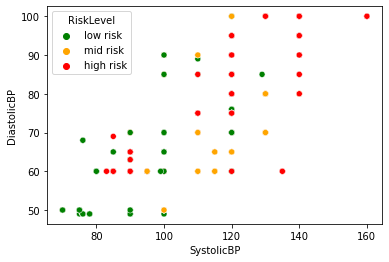

In [38]:
sns.scatterplot(data=df, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Apparently, pregnant women with lower SystolicBP and DiastolicBP seems to have a lower health risk.
2. But otherwise, the higher SystolicBP and DiastolicBP they have, the higher their health risk.

## 6.7 SystolicBP and BS → RiskLevel

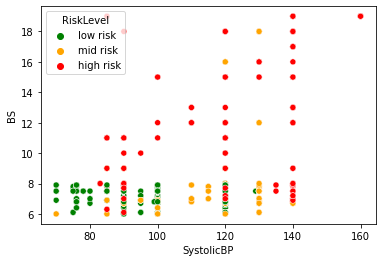

In [39]:
sns.scatterplot(data=df, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. We can see almost similar pattern as before.
2. However, a higher BS value seems to affect the health risks of pregnant women more.

## 6.8 SystolicBP and BodyTemp → RiskLevel

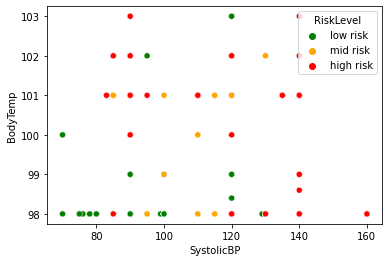

In [40]:
sns.scatterplot(data=df, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with normal body temperature and low SystolicBP mostly has low health risk.
2. But the one who has high SystolicBP seems to have higher health risk, regardless of their body temperature.

## 6.9 SystolicBP and HeartRate → RiskLevel

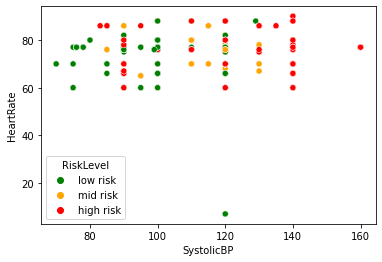

In [41]:
sns.scatterplot(data=df, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. HeartRate value seems has less effect on pregnant women's health risk compared to SystolicBP.
2. Looks like HeartRate variabel isn't really useful.

## 6.10 DiastolicBP and BS → RiskLevel

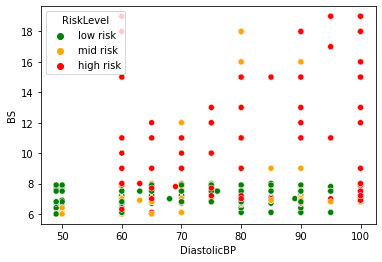

In [42]:
sns.scatterplot(data=df, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with high blood glucose level has higher health risk, regardless of their DiastolicBP.

## 6.11 DiastolicBP and BodyTemp → RiskLevel

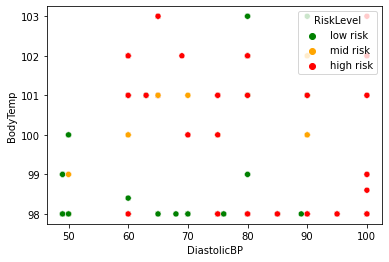

In [43]:
sns.scatterplot(data=df, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with low DiastolicBP and low body temperature mostly has low health risk, but their health risk will get higher if they have higher body temperature.

## 6.12 DiastolicBP and HeartRate → RiskLevel

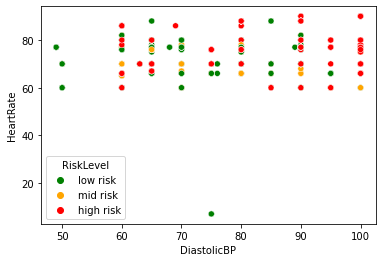

In [44]:
sns.scatterplot(data=df, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Again, HeartRate value seems has less effect on pregnant women's health risk compared to DiastolicBP.
2. Looks like HeartRate variabel isn't really useful.

## 6.13 BS and BodyTemp → RiskLevel

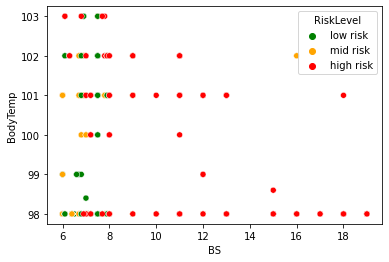

In [45]:
sns.scatterplot(data=df, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with high blood glucose level seems to have a high health risk, regardless of their body temperature.

## 6.14 BS and HeartRate → RiskLevel

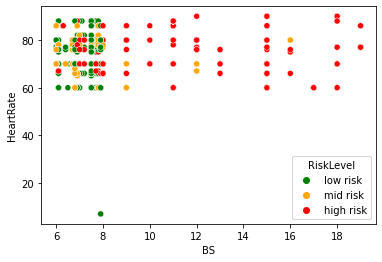

In [46]:
sns.scatterplot(data=df, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Apparently, Pregnant women with higher blood glucose level seems to have a higher health risk, regardless of their heart rate.

## 6.15 BodyTemp and HeartRate → RiskLevel

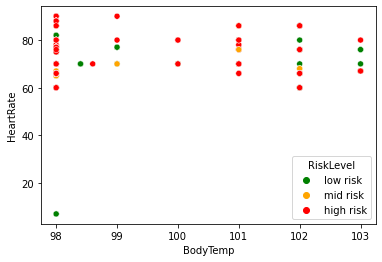

In [47]:
sns.scatterplot(data=df, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

**Observation:**
1. Pregnant women with higher body temperature seems to have a higher health risk, regardless of their heart rate (please note that according to previous analysis, pregnant women in this obervation mostly has 98 F body temperature).
2. HeartRate variable really isn't helpful in this case.

# 7. Feature Engineering and Data Cleaning

## 7.1 Outlier Handling

As we know from the previous analysis, in this dataset there are several variables that have outliers, but even so most of those values still make sense in real life. The only variable that has an outlier with an unreasonable value is HeartRate. In this variable, there are two observations that have a heart rate value of 7 bpm (beats per minute). A normal resting heart rate for adults ranges from 60 to 100 beats per minute, and the lowest recorded resting heart rate in human history was 25 bpm. Therefore, we will drop this 2 records that has a heart rate value of 7 because that value doesn't make any sense, and most likely is an input error.

We won't store processed data in the original variable, but instead we will store it in the new variable, so we can compare it with the original data.

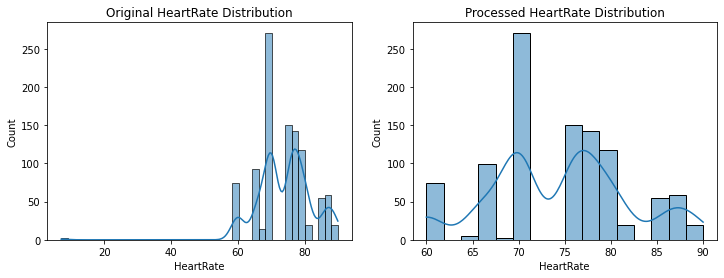

In [48]:
data_proc = df.drop(df.index[df.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

## 7.2 Removing Irrelevant Features
After conducting several analyzes of the predictor variables, we conclude that the HeartRate variable is less helpful in determining the health risks of pregnant women. So, it's safe to remove that variable.

In [49]:
data_proc = data_proc.drop(["HeartRate"], axis=1)

You might think why we drop records that has outlier on HeartRate variable if we will delete that variable in the end. The answer is because it has input error in it, so that records maybe not legit. It could be that the label given is also not correct, so it will mislead the training process which makes the model becomes less accurate.

## 7.3 Feature Transformation

# 8. Model Building

## 8.1 Splitting Dataset

We will split our dataset into 80% train data and 20% test data.

In [50]:
# Original Dataset
X = df.drop("RiskLevel", axis=1)
y = df.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.2, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processes data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 811 train data and 203 test data

Processes data has 809 train data and 203 test data


## 8.2 Building Classification Model using RandomForestClassifier

In this case we will use Random Forest algorithm to build our model. Random forest contains many decision trees representing a distinct instance of the classification of data input. The random forest technique considers the instances individually, taking the one with the majority of votes as the selected prediction. In such a way, the random forest enables any classifiers with weak correlations to create a strong classifier.

We choose Random Forest because it's one of the most accurate learning algorithms available, and it's training time is fast. Also, Random Forest can work on dataset that have feature values with different scales, so we don't need to do normalization/feature scaling.

In [51]:
# Using original dataset
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Original Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

# Using processed dataset
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_proc, y_train_proc)
y_pred = rf2.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Original Dataset Accuracy: 0.8669950738916257
Processed Dataset Accuracy: 0.8916256157635468


Here we go. We got 2.46% more test data accuracy with our processed dataset. It shows that our model has better generalization with our processed dataset to our test data. Not only that, Random Forest also has several hyperparameters that we can adjust to get a model with even better generalization.

## 8.2.1 Hyperparameter Tuning
We will try to adjust 2 of Random Forest parameters, which is n_estimators and criterion. n_estimator is the number of trees in the forest, while criterion is the function to measure the quality of a split. To do that, we will use GridSearchCrossValidation with the number of folds as much as 10. 

In [52]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train_proc, y_train_proc)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


In [53]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.831867,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.830648,2
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.828179,3
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.828164,4
1,"{'criterion': 'gini', 'n_estimators': 20}",0.823241,5
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.822006,6
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.818210,7
0,"{'criterion': 'gini', 'n_estimators': 10}",0.808302,8


In [64]:
y_pred_rf = grid.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred_rf)}")

Processed Dataset Accuracy: 0.9014778325123153


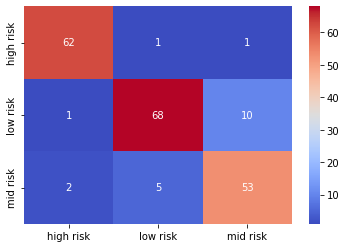

In [55]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

That's it. After doing hyperparameter tuning, we got the best value for criterion is 'gini' and n_estimators is 50. With that parameter value, the accuracy of the resulting model increased by almost 1% to the test data. Although it's not much, but still there is an improvement from the resulting model.

# 8.3 Using Gradient Boosting Classifier

In [56]:
GBC=GradientBoostingClassifier()
# Using original dataset
GBC.fit(x_train , y_train)
y_pred=GBC.predict(x_test)
print("Train accuracy:",GBC.score(x_train,y_train))

# Using Processed dataset
GBC.fit(x_train_proc , y_train_proc)
y_pred=GBC.predict(x_test_proc)
print("Test accuracy:",GBC.score(x_test_proc,y_test_proc))

Train accuracy: 0.8668310727496917
Test accuracy: 0.812807881773399


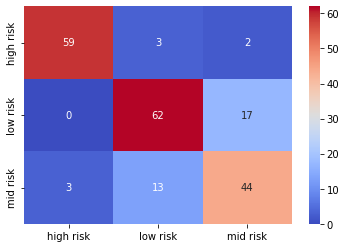

In [57]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

# 8.4 Using Support Vector Classifier

In [58]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

# Using original dataset
svm = SVC(kernel='rbf', random_state=42, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(" Original Dataset accuracy:",svm.score(x_test,y_test))

# Using processed dataset
svm = SVC(kernel='rbf', random_state=42, gamma=.10, C=1.0)
svm.fit(x_train_proc, y_train_proc)
y_pred = svm.predict(x_test_proc)
print(" Processed Dataset accuracy:",svm.score(x_test_proc,y_test_proc))

 Original Dataset accuracy: 0.7192118226600985
 Processed Dataset accuracy: 0.7684729064039408


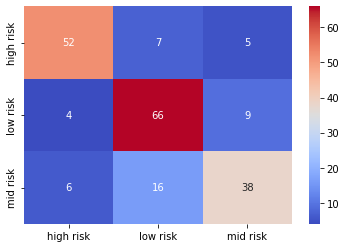

In [59]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

# 8.5 Using Gaussian Naive Bayes

In [60]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Using original dataset
nb.fit(x_train , y_train)
y_pred=nb.predict(x_test)
print("Train accuracy:",nb.score(x_train,y_train))

# Using Processed dataset
nb.fit(x_train_proc , y_train_proc)
y_pred=nb.predict(x_test_proc)
print("Test accuracy:",nb.score(x_test_proc,y_test_proc))

Train accuracy: 0.6128236744759556
Test accuracy: 0.6059113300492611


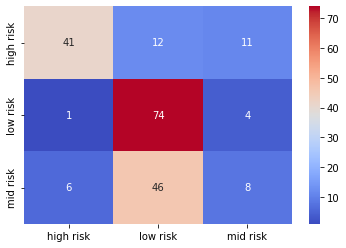

In [61]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

# 9. Identifying the Best Model

In [65]:
Model_Scores=pd.DataFrame(columns=['Machine_Learning_Algorithm',"Processed_Data_Accuracy"])
Model_Scores["Machine_Learning_Algorithm"]=['Random Forest Classifeir',"Gradient Boosting Classifier","Support Vector Machine","Gaussian Naive Bayes" ]
Model_Scores['Processed_Data_Accuracy']=[accuracy_score(y_test_proc, y_pred_rf),GBC.score(x_test_proc,y_test_proc),svm.score(x_test_proc,y_test_proc),nb.score(x_test_proc,y_test_proc)]
Model_Scores

,Machine_Learning_Algorithm,Processed_Data_Accuracy
0,Random Forest Classifeir,0.901478
1,Gradient Boosting Classifier,0.812808
2,Support Vector Machine,0.768473
3,Gaussian Naive Bayes,0.605911


# 10. Conclusion

After doing some analysis on this dataset, we can conclude that BS or blood glucose level is the most important variable in determining the health level of pregnant women. Pregnant women who have high blood glucose level tend to have high health risks. More than 75% of pregnant women with BS of 8 or more have high health risk. BS also has relatively strong positive correlation to Age, SystolicBP, and DiastolicBP, so pregnant women who have high Age, SystolicBP, and DiastolicBP need to be vigilant. Age is also a fairly important variable, where the health risks of pregnant women seem to start to increase starting from the age of 25 years. For SystolicBP and DiastolicBP , these two variables actually have a strong relationship, as evidenced by the correlation coefficient value of 0.79. About BodyTemp, this variable is actually not giving much information because more than 79% of the total value is 98F. But from this variable, we know that pregnant women who have a body temperature above 98.4F tend to have a greater health risk. And the last one is HeartRate which is the least relevant variable in determining the health level of pregnant women. 

And finally we can build our classification model using Random Forest algorithm to this dataset. With original dataset, we get an accuracy of 86.7%. But after we do some feature engineering and data cleaning by removing outlier and deleting irrelevant variable, the accuracy we get increases to 89.16%. It shows that our model has better generalization with our processed dataset. We also did hyperparameter tuning to get best hyperparameter for Random Forest algorithm. By using best hyperparameter that have been obtained, the model is able to produce a higher accuracy, which is 90.15%.
